In [103]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from olist.data import Olist

# How we can improve the profits of Olist? 

In [104]:
from olist.order import Order
from olist.seller import Seller
orders = Order().get_training_data(with_distance_seller_customer=True)
sellers= Seller().get_training_data()

/Users/iliyask/code/iliyaskurmangali/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv
/Users/iliyask/code/iliyaskurmangali/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv
/Users/iliyask/code/iliyaskurmangali/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv
/Users/iliyask/code/iliyaskurmangali/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv
/Users/iliyask/code/iliyaskurmangali/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv


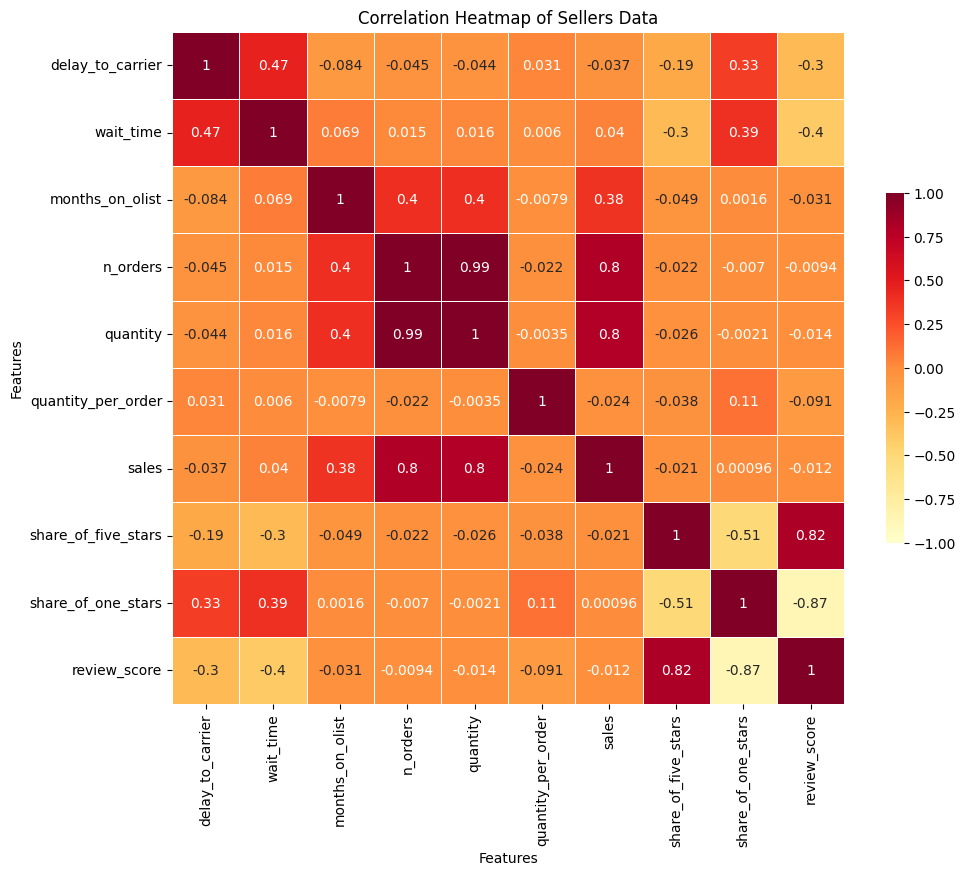

In [109]:
seller_corr = sellers.corr()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Create the heatmap
sns.heatmap(seller_corr, annot=True, cmap='YlOrRd', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and axis labels
ax.set_title('Correlation Heatmap of Sellers Data')
ax.set_xlabel('Features')
ax.set_ylabel('Features')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust the layout to make room for the title and axis labels
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.2, right=0.9)

# Display the plot
plt.show()

In [7]:
def assign_review_cost(reviews):
  """
  Assigns a review cost based on the number of reviews.

  Args:
      reviews (int): The number of reviews.

  Returns:
      int: The review cost based on the number of reviews.
  """
  if reviews == 1:
    return 100
  elif reviews == 2:
    return 50
  elif reviews == 3:
    return 40
  else:
    return 0


In [8]:
data_sellers=sellers.copy()
data_sellers[['months_on_olist']]=data_sellers[['months_on_olist']].replace(0, 1)
revenue_data=data_sellers[['months_on_olist','seller_id','n_orders','quantity','quantity_per_order','sales']]
revenue_data=data_sellers[['months_on_olist','seller_id','n_orders','quantity','quantity_per_order','sales']]
revenue_data['total_sales']=revenue_data.groupby('seller_id')[['sales']].sum().reset_index()[['sales']]
revenue_data['subscription_fee']=revenue_data['months_on_olist']*80
revenue_data['total_revenue']=revenue_data['total_sales']*0.1+revenue_data['subscription_fee']
data=Olist().get_data()
data_orders=data['orders']
data_order_items=data['order_items']
data_order_reviews=data['order_reviews']
merged_data=pd.merge(data_order_reviews,data_orders, on='order_id',how='inner')[['review_id','order_id','review_score']].merge(data_order_items, on='order_id')[['review_id','order_id','review_score','seller_id']]
merged_data['review_cost']=merged_data['review_score'].apply(assign_review_cost)
merged_data_review_cost=merged_data.groupby('seller_id')[['review_cost']].sum().reset_index()
revenue_data=pd.merge(revenue_data,merged_data_review_cost, on='seller_id', how='inner')
revenue_data['profit']=revenue_data['total_revenue']-revenue_data['review_cost']


/var/folders/qh/z2q31mxn1w14dq3q46dj8fnh0000gn/T/ipykernel_17931/170938503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_data['total_sales']=revenue_data.groupby('seller_id')[['sales']].sum().reset_index()[['sales']]
/var/folders/qh/z2q31mxn1w14dq3q46dj8fnh0000gn/T/ipykernel_17931/170938503.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_data['subscription_fee']=revenue_data['months_on_olist']*80
/var/folders/qh/z2q31mxn1w14dq3q46dj8fnh0000gn/T/ipykernel_17931/170938503.py:7: Setti

/Users/iliyask/code/iliyaskurmangali/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv


In [132]:
revenue_data

,months_on_olist,seller_id,n_orders,quantity,quantity_per_order,sales,total_sales,subscription_fee,total_revenue,review_cost,profit
0,4.0,3442f8959a84dea7ee197c632cb2df15,3,3,1.000000,218.70,2685.00,320.0,588.500,140,448.500
1,14.0,d1b65fc7debc3361ea86b5f14c68d2e2,40,41,1.025000,11703.07,25080.03,1120.0,3628.003,240,3388.003
2,1.0,ce3ad9de960102d0677a81f5d0bb7b2d,1,1,1.000000,158.00,1234.50,80.0,203.450,0,203.450
3,1.0,c0f3eea2e14555b6faeea3dd58c1b1c3,1,1,1.000000,79.99,120.00,80.0,92.000,0,92.000
4,1.0,51a04a8a6bdcb23deccc82b0b80742cf,1,1,1.000000,167.99,19712.71,80.0,2051.271,100,1951.271
...,...,...,...,...,...,...,...,...,...,...,...
2962,1.0,98dddbc4601dd4443ca174359b237166,2,2,1.000000,158.00,1649.01,80.0,244.901,0,244.901
2963,14.0,f8201cab383e484733266d1906e2fdfa,10,10,1.000000,889.00,2101.20,1120.0,1330.120,140,1190.120
2964,5.0,74871d19219c7d518d0090283e03c137,6,7,1.166667,550.04,1839.86,400.0,583.986,0,583.986
2965,4.0,e603cf3fec55f8697c9059638d6c8eb5,8,11,1.375000,297.00,9062.30,320.0,1226.230,50,1176.230


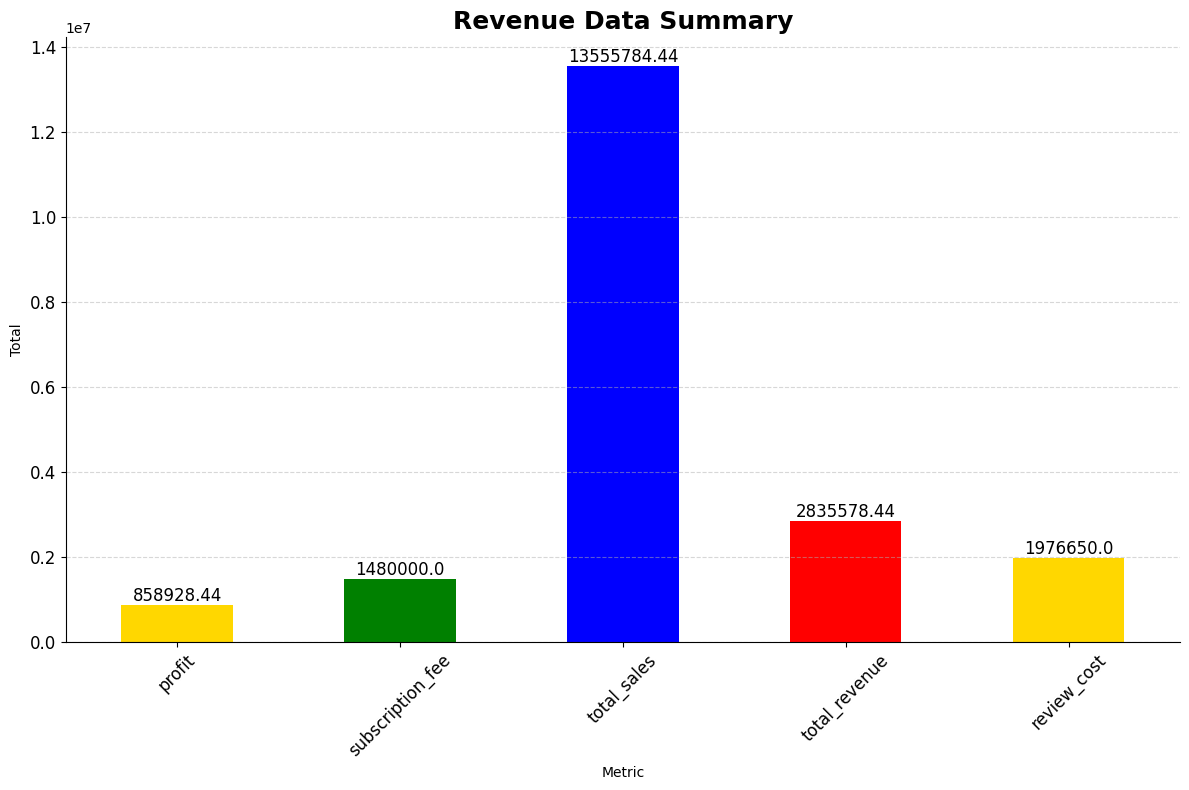

In [133]:
revenue_totals = revenue_data[['profit', 'subscription_fee', 'total_sales', 'total_revenue','review_cost']].agg(sum)
# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
revenue_totals.plot(kind='bar', ax=ax, color=['gold', 'green', 'blue', 'red'])

# Add labels and title
ax.set_xlabel('Metric')
ax.set_ylabel('Total')
ax.set_title('Revenue Data Summary', fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels
for i, v in enumerate(revenue_totals):
    ax.text(i, v, str(round(v, 2)), color='black', ha='center', va='bottom', fontsize=12)

# Customize the appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

# Display the chart
plt.show()



# Our review cost is too high, so how we can cut our review costs, so we can improve profits?


In [10]:
def total_data(n):
    df=revenue_data.sort_values('profit')
    df.drop(df.index[:n], inplace=True)
    return df

In [11]:
def review_cost(n):
    return total_data(n)['review_cost'].sum()

In [15]:
def profit_before_it_cost(n):
    return total_data(n)['profit'].sum()

In [12]:
def IT_cost(n):
    df=total_data(n)
    n_items=df['quantity'].sum()
    a=3157.27
    b=978.23
    n_sellers=df.shape[0]
    IT_cost=a*np.sqrt(n_sellers) + b*np.sqrt(n_items)
    return IT_cost

In [13]:
def profit(n):
    return total_data(n)['profit'].sum() - IT_cost(n)

In [142]:
import plotly
import plotly.graph_objects as go
import numpy as np
plotly.offline.init_notebook_mode(connected=True)

# Assuming you have the following data
y = [profit(x) for x in range(2900)]
x = [x for x in range(2900)]
z = [IT_cost(x) for x in range(2900)]
c = [profit_before_it_cost(x) for x in range(2900)]
r=[review_cost(x) for x in range(2900)]
# Create the figure
fig = go.Figure()

# Add the data traces
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Total Profit'))
fig.add_trace(go.Scatter(x=x, y=z, mode='lines', name='IT Cost'))
fig.add_trace(go.Scatter(x=x, y=c, mode='lines', name='Profit Before IT Cost'))
fig.add_trace(go.Scatter(x=x, y=r, mode='lines', name='Review Cost'))

# Set the layout
fig.update_layout(
    title='Profit, IT Cost, and Profit Before IT Cost, Review Cost',
    xaxis_title='Number of Sellers to Get Rid Of',
    yaxis_title='millions of BRL',
    legend_title='Legend',
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    width=1000,
    height=600
)

# Find the maximum profit and the corresponding number of sellers
ymax = np.max(y)
xpos = y.index(ymax)
xmax = x[xpos]

# Add an annotation to the graph
fig.add_annotation(
    x=xmax,
    y=ymax,
    text=f'Max Profit: {round(ymax)}\nNumber of Sellers: {xmax} BRL',
    showarrow=True,
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='black'
)

# Show the graph
fig.show()


## We can remove  631 sellers, so it can increase our profits to maximum, but is it really right way?

In [18]:
from olist.product import Product
product_data=Product().get_training_data()

/Users/iliyask/code/iliyaskurmangali/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv
/Users/iliyask/code/iliyaskurmangali/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv
/Users/iliyask/code/iliyaskurmangali/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv
/Users/iliyask/code/iliyaskurmangali/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv



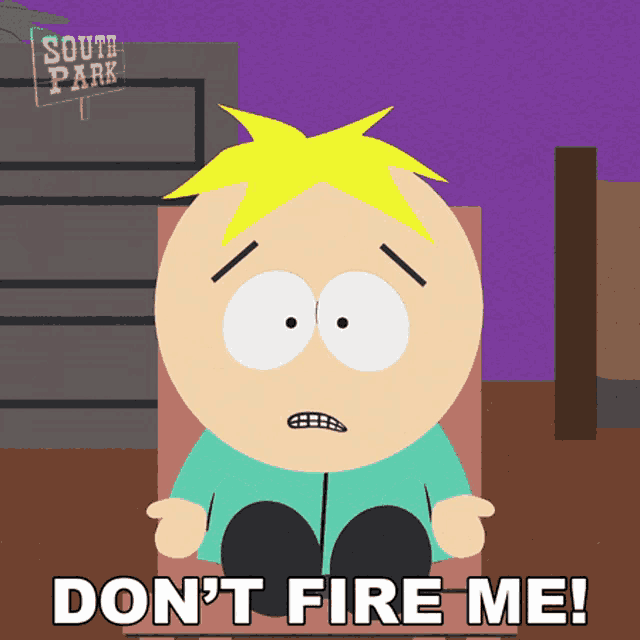

In [30]:
product_data['review_cost']=product_data['review_score'].apply(assign_review_cost)
product_data['revenue']=0.1*product_data['sales']
product_data['profit']=product_data['revenue']-product_data['review_cost']
product_data.groupby('category')[['review_cost','revenue','quantity','profit']].sum().sort_values(by='profit')

,review_cost,revenue,quantity,profit
category,,,,
fashion_male_clothing,2200,1030.723,125,-1169.277
fashio_female_clothing,660,270.974,47,-389.026
security_and_services,100,28.329,2,-71.671
arts_and_craftmanship,180,181.401,24,1.401
dvds_blu_ray,580,596.259,62,16.259
...,...,...,...,...
bed_bath_table,41360,103083.498,11046,61723.498
sports_leisure,28040,97654.815,8570,69614.815
computers_accessories,19370,89946.574,7766,70576.574


In [31]:
product_check_profit=product_data.groupby('product_id')[['review_cost','revenue','quantity','profit']].sum().sort_values(by='profit').reset_index()

In [32]:
def total_data_product(n):
    df=product_check_profit.sort_values('profit')
    df.drop(df.index[:n], inplace=True)
    return df

In [33]:
def review_cost_product(n):
    return total_data_product(n)['review_cost'].sum()

In [34]:
def profit_product(n):
    return total_data_product(n)['profit'].sum()

In [35]:
def revenue_product(n):
    return total_data_product(n)['revenue'].sum()

In [138]:
import plotly.graph_objects as go
import numpy as np

y = [profit_product(x) for x in range(4000)]
x = [x for x in range(4000)]
z = [review_cost(x) for x in range(4000)]
d = [revenue_product(x) for x in range(4000)]

# Create the figure
fig = go.Figure()

# Add the data traces
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Total Profit'))
fig.add_trace(go.Scatter(x=x, y=z, mode='lines', name='Review Cost'))
fig.add_trace(go.Scatter(x=x, y=d, mode='lines', name='Revenue OLS (not including subscription fee)'))

# Set the layout
fig.update_layout(
    title='Profit, Review Cost, and Revenue by Product_id',
    xaxis_title='Number of product_id to remove',
    yaxis_title='Value',
    legend_title='Legend',
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    width=1200,  # Increase the figure width
    height=800   # Increase the figure height
)

# Find the maximum profit and the corresponding x-value
ymax = np.max(y)
xpos = y.index(ymax)
xmax = x[xpos]

# Add an annotation to the graph
fig.add_annotation(
    x=xmax,
    y=ymax,
    text=f'Max profit is {round(ymax)} and number of product_id to drop is {xmax}',
    showarrow=True,
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='black'
)

# Show the graph
fig.show()

KeyboardInterrupt: 

In [51]:
order_items=data['order_items'][['seller_id','product_id']]

In [94]:
def sellers_number(n):
    return pd.merge(total_data_product(n),order_items, on='product_id').drop_duplicates()['seller_id'].nunique()

2843

In [145]:
y = [profit_product(x) for x in range(4000)]
x = [x for x in range(4000)]
z = [review_cost(x) for x in range(4000)]
d = [revenue_product(x) for x in range(4000)]
# Create the figure
fig = go.Figure()

# Add the data traces
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Total Profit'))
fig.add_trace(go.Scatter(x=x, y=z, mode='lines', name='Review Cost'))
fig.add_trace(go.Scatter(x=x, y=d, mode='lines', name='Revenue OLIST (not including subscription fee)'))

# Set the layout
fig.update_layout(
    title='Profit, Review Cost, and Revenue by Product_id',
    xaxis_title='Number of product_id to remove',
    yaxis_title='millions of BRL',
    legend_title='Legend',
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    width=1000,  # Increase the figure width
    height=600   # Increase the figure height
)

# Find the maximum profit and the corresponding x-value
ymax = np.max(y)
xpos = y.index(ymax)
xmax = x[xpos]

# Add an annotation to the graph
fig.add_annotation(
    x=xmax,
    y=ymax,
    text=f'Max profit is {round(ymax)} and number of product_id to drop is {xmax}',
    showarrow=True,
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='black'
)

# Show the graph
fig.show()

## Or we could remove the number of products that give higher review costs so reducing it could save us the sellers?  

## By getting rid of 3000  bad performing product id, our number of sellers will be 2843

In [144]:
sellers_number(3000)

2843

## So, instead of entirely removing sellers from Olists, we should focus on removing the specific products that receive bad review scores, rather than removing the entire seller. This approach allows us to retain good sellers who may excel at certain product categories, while addressing the problematic products that are driving up review costs and losses. 


# Thank you for your Attention!

